In [1]:
import csv
import pandas as pd
import numpy as np
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
import os
BIGQUERY_PROJECT = 'cloud-test-ironhacks'
BIGQUERY_KEYPATH = 'cloud-test-ironhacks-c1010c49a602.json'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = BIGQUERY_KEYPATH
bigquery_client = bigquery.Client(project=BIGQUERY_PROJECT)

In [3]:
query = """
SELECT * FROM `cloud-test-ironhacks.dwd_data.suppression_remove`

"""

query_job = bigquery_client.query(query)
data = query_job.to_dataframe()
data = data.dropna()
data

,uu_id,timeperiod,week_number,countyfips,tract,tract_name,total_claims,edu_8th_or_less,edu_grades_9_11,edu_hs_grad_equiv,...,gender_female,gender_male,gender_na,race_amerindian,race_asian,race_black,race_noanswer,race_hawaiiannative,race_other,race_white
59040,9bee42b55f891413ae7fac2d9d89280a,20210306.0,10.0,18003.0,100.0,"Census Tract 1, Allen County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59064,9bee42b55f891413ae7fac2d9d89280a,20210529.0,22.0,18003.0,100.0,"Census Tract 1, Allen County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59123,3952d1e916f8cad4225e4b9e29f62a06,20210306.0,10.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59147,3952d1e916f8cad4225e4b9e29f62a06,20210529.0,22.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59178,3952d1e916f8cad4225e4b9e29f62a06,20211016.0,42.0,18039.0,100.0,"Census Tract 1, Elkhart County, Indiana",15.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184317,20f6ad2e745b760f4d67491c4c9f2881,20210807.0,32.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184318,20f6ad2e745b760f4d67491c4c9f2881,20210814.0,33.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184319,20f6ad2e745b760f4d67491c4c9f2881,20210821.0,34.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
184320,20f6ad2e745b760f4d67491c4c9f2881,20210828.0,35.0,18127.0,990000.0,"Census Tract 9900, Porter County, Indiana",0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df = data.groupby(['week_number']).total_claims.sum().groupby(level=0).cumsum().reset_index()
df

,week_number,total_claims
0,1.0,198.0
1,2.0,13.0
2,3.0,232.0
3,4.0,0.0
4,5.0,198.0
5,6.0,84.0
6,7.0,128.0
7,8.0,194.0
8,9.0,298.0
9,10.0,92.0


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='week_number', ylabel='total_claims'>

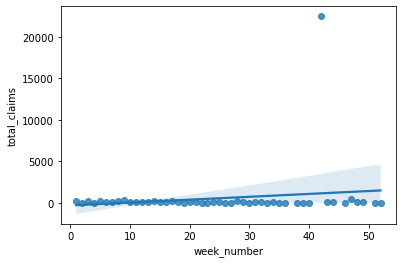

In [5]:
sns.regplot(df['week_number'], df['total_claims'])

In [6]:
df['lag'] = df['total_claims'].shift(1).dropna()
df

,week_number,total_claims,lag
0,1.0,198.0,NaN
1,2.0,13.0,198.0
2,3.0,232.0,13.0
3,4.0,0.0,232.0
4,5.0,198.0,0.0
5,6.0,84.0,198.0
6,7.0,128.0,84.0
7,8.0,194.0,128.0
8,9.0,298.0,194.0
9,10.0,92.0,298.0


In [7]:
X = df['lag'].dropna()
y = df['total_claims']
y, X = y.align(X, join='inner')  # drop corresponding values in target
X

1       198.0
2        13.0
3       232.0
4         0.0
5       198.0
6        84.0
7       128.0
8       194.0
9       298.0
10       92.0
11      103.0
12       62.0
13       79.0
14      203.0
15      147.0
16      135.0
17      257.0
18      166.0
19       35.0
20       62.0
21      125.0
22       33.0
23        0.0
24      167.0
25       58.0
26       38.0
27       51.0
28      195.0
29      102.0
30       43.0
31      142.0
32      170.0
33       41.0
34       80.0
35        0.0
36        0.0
37       11.0
38       24.0
39       24.0
40    22482.0
41       90.0
42       68.0
43       28.0
44      418.0
45       76.0
46       55.0
47       12.0
Name: lag, dtype: float64

In [8]:
X = X.values.reshape(-1,1)
y = y.values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.04, random_state = 0)

regressor = LinearRegression().fit(X,y)

In [9]:
#To retrieve the intercept:
print(regressor.intercept_)

#For retrieving the slope:
print(regressor.coef_)

[590.55254233]
[[-0.02575295]]


In [10]:
y_pred = regressor.predict(X_test)

In [11]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,43.0,587.925742
1,0.0,588.492306


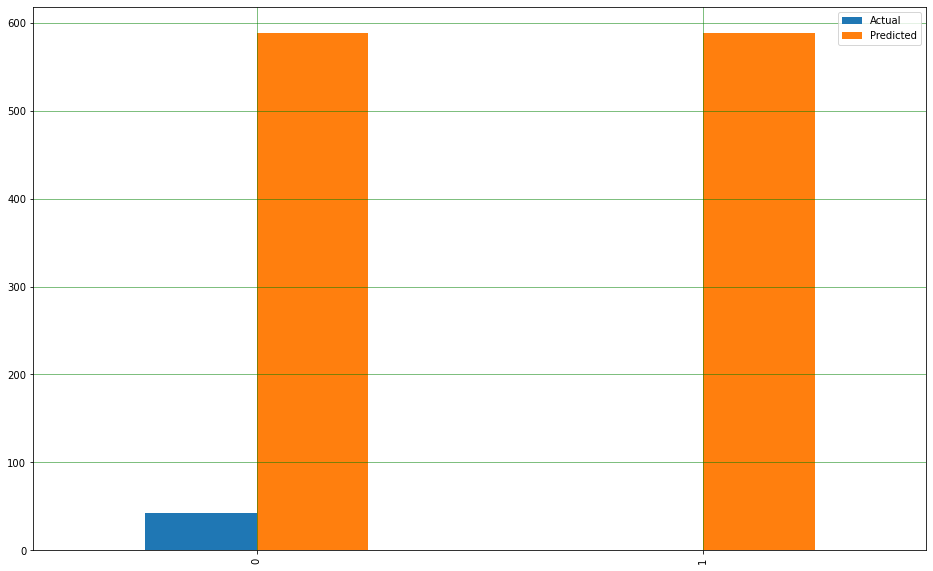

In [12]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 566.7090240680132
Mean Squared Error: 321633.62935341994
Root Mean Squared Error: 567.1275247714749
